# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [58]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd

## Dataset


In [59]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


In [60]:
loan_data.head()
print(loan_data['education'].unique())
print(loan_data['self_employed'].unique())
print(loan_data['loan_status'].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


## EDA
Uncomment to see desired output. Add more analysis if you like

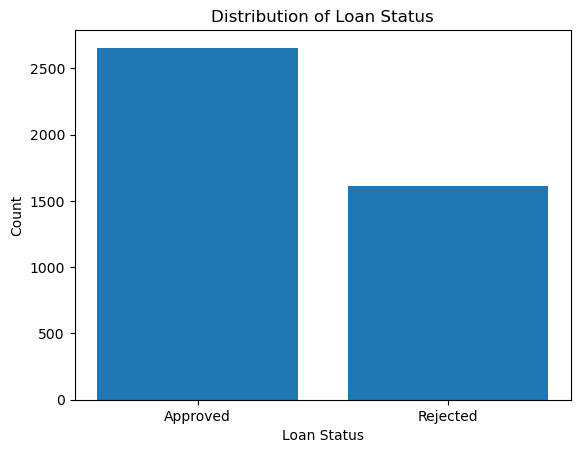

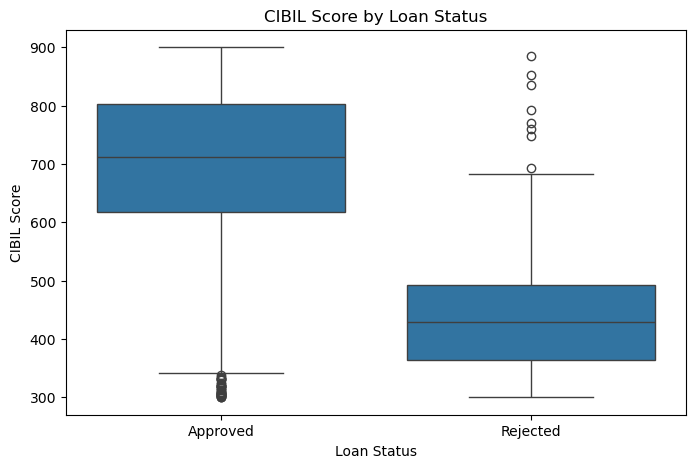

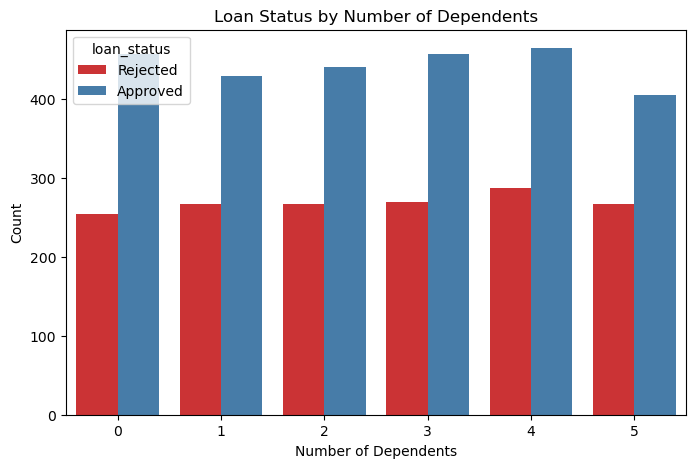

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ------ Display basic information ------
# print(loan_data.columns)
# print(loan_data.describe())

# ------ Check for missing values ------
# print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
# loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- Boxplot of CIBIL score by loan status------
plt.figure(figsize=(8, 5))
sns.boxplot(data=loan_data, x='loan_status', y='cibil_score')
plt.title('CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

# ----- Countplor of dependents VS loan status------
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_data, x='no_of_dependents', hue='loan_status', palette='Set1')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()


## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [ ]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0}) #education to 1 and 0

loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0}) #self employed to 1 and 0

loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0}) #loan status to 1 and 0

loan_data.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Model Training and Evaluation

In [86]:
X = loan_data.drop(['loan_id', 'loan_status'], axis=1)
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into training and test sets

model = LogisticRegression(max_iter=1000, random_state=42) #initialize + train logisticrRegression model
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [87]:
#train set evaluation
print("TRAINING SET PERFORMANCE:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Evaluation on test set
print("TEST SET PERFORMANCE:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

TRAINING SET PERFORMANCE:
[[ 783  512]
 [ 188 1932]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1295
           1       0.79      0.91      0.85      2120

    accuracy                           0.80      3415
   macro avg       0.80      0.76      0.77      3415
weighted avg       0.80      0.80      0.79      3415

TEST SET PERFORMANCE:
[[194 124]
 [ 48 488]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       318
           1       0.80      0.91      0.85       536

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854



## Model Optimization and Testing

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc") #cross validation for AUC estimate
print(f"Cross validation score {cv_scores}")
print(f"Mean {cv_scores.mean()}")

Cross validation score [0.99610257 0.99700408 0.9969631  0.99736377 0.99841098]
Mean 0.9971689007066364


After optimizing the model using cross-validation the accuracy score improved to a mean of 0.997. This shows how my model optimization significantly enhanced the predictive performance and generalizability of the loan approval model.